In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\Anindita Mitra\Dataset\height-weight\height.csv")

In [3]:
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Standard Deviation to remove Outliers

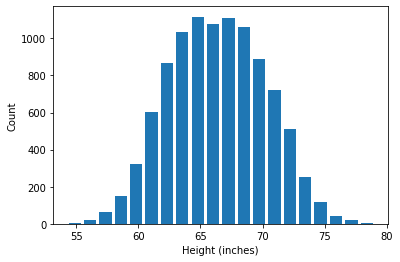

In [4]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel ('Count')
plt.show()

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


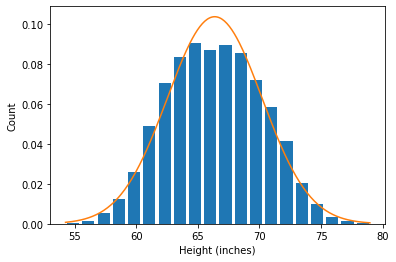

In [6]:
from scipy.stats import norm
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel ('Count')

rng = np.arange(df.Height.min(), df.Height.max(),0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

In [7]:
df.Height.min()

54.2631333250971

In [8]:
df.Height.max()

78.99874234638959

In [9]:
df.Height.std()

3.847528120773233

In [12]:
# figure out upper limit
#anything more than "77.91014411714076" is an outlier
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714076

In [14]:
# figure out lower limit
#anything less than "54.82497539250136" is an outlier
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.82497539250136

In [15]:
#below are the records which are outliers in our dataframe
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [19]:
#Removing Outlier
df_outlier = df[(df.Height<upper_limit) & (df.Height>lower_limit)]

In [20]:
df_outlier.shape

(9993, 3)

In [21]:
# Check the no of outliers removed
df.shape[0] - df_outlier.shape[0]

7

# Z Score to remove Outliers

Calculate the Z Score

The formula for calculating a z-score is is z = (x-μ)/σ, where x is the raw score, μ is the population mean, and σ is the population standard deviation. As the formula shows, the z-score is simply the raw score minus the population mean, divided by the population standard deviation. ... Z-score formula in a population.


In [24]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [25]:
#find z score more than 3
df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [27]:
#find z score less  than -3
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [28]:
#List of Outliers (| means or)

df[(df.zscore<-3) | (df.zscore>3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [29]:
#Remove Outliers
df_outliers_z = df[(df.zscore>-3) & (df.zscore<3)]
df_outliers_z.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
